In [1]:
########################################################################
# 2. DEFINE YOUR CONVOLUTIONAL NEURAL NETWORK
########################################################################

import torch.nn as nn
import torch.nn.functional as F


class ConvNet(nn.Module):
    def __init__(self, init_weights=False):
        super(ConvNet, self).__init__()
        # Initialize layers here
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.25)
        )
        self.fc1 = nn.Linear(2 * 2 * 256, 512)
        self.fc2 = nn.Linear(512, 10)

        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        # Pass image x through each layer defined above
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

    def _initialize_weights(self):
        # Initialize weights
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


100%|██████████| 170498071/170498071 [00:02<00:00, 79310721.12it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Train: [1,    20] loss: 2.346 acc: 10.625
Train: [1,    40] loss: 2.226 acc: 14.062
Train: [1,    60] loss: 2.088 acc: 17.083
Train: [1,    80] loss: 2.014 acc: 18.945
Train: [1,   100] loss: 1.947 acc: 20.500
Train: [1,   120] loss: 1.972 acc: 21.016
Train: [1,   140] loss: 1.838 acc: 23.013
Train: [1,   160] loss: 1.875 acc: 24.141
Train: [1,   180] loss: 1.807 acc: 25.330
Train: [1,   200] loss: 1.784 acc: 25.891
Train: [1,   220] loss: 1.789 acc: 26.534
Train: [1,   240] loss: 1.724 acc: 27.135
Train: [1,   260] loss: 1.712 acc: 27.837
Train: [1,   280] loss: 1.683 acc: 28.549
Train: [1,   300] loss: 1.695 acc: 29.115
Train: [1,   320] loss: 1.609 acc: 29.824
Train: [1,   340] loss: 1.607 acc: 30.414
Train: [1,   360] loss: 1.632 acc: 30.833
Train: [1,   380] loss: 1.656 acc: 31.234
Train: [1,   400] loss: 1.671 acc: 31.688
Train: [1,   420] loss: 1.687 acc: 32.054
Train: [1,   440] loss: 1.553 acc: 32.521
Train: [1,   460] loss: 1.556 acc: 32.846
Train: [1,   480] loss: 1.608 acc:

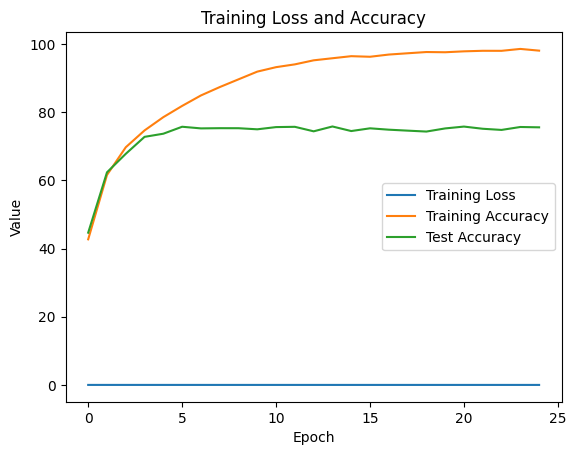

Finished Training
Final Test Accuracy of the Best Model: 75.560 %


In [5]:
"""
---------------------------------------------------------------------
Training an image classifier
---------------------------------------------------------------------
For this assingment you'll do the following steps in order:
1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network (at least 4 conv layer)
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data
---------------------------------------------------------------------
"""

# IMPORTING REQUIRED PACKAGES
import os
import numpy as np
import scipy.io as sio
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
#from cnn_model import ConvNet

# DEFINE VARIABLE
BATCH_SIZE = 32                 # YOU MAY CHANGE THIS VALUE
EPOCH_NUM = 25                  # YOU MAY CHANGE THIS VALUE
LR = 0.001                      # YOU MAY CHANGE THIS VALUE
MODEL_SAVE_PATH = './Models'

if not os.path.exists(MODEL_SAVE_PATH):
    os.mkdir(MODEL_SAVE_PATH)

# DEFINING TRANSFORM TO APPLY TO THE IMAGES
# YOU MAY ADD OTHER TRANSFORMS FOR DATA AUGMENTATION
transform = transforms.Compose(
    [transforms.Resize(32),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


########################################################################
# 1. LOAD AND NORMALIZE CIFAR10 DATASET
########################################################################

# Get train and test dataset from torchvision and create respective dataloader
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

########################################################################
# 2. DEFINE YOUR CONVOLUTIONAL NEURAL NETWORK AND IMPORT IT
########################################################################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = ConvNet().to(device) # MAKE SURE TO DEFINE ConvNet IN A CELL ABOVE THE STARTER CODE OF WHICH IS IN cnn_model.py
# You can pass arguments to ConvNet if you want instead of hard coding them.

########################################################################
# 3. DEFINE A LOSS FUNCTION AND OPTIMIZER
########################################################################

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9)

########################################################################
# 4. TRAIN THE NETWORK
########################################################################

test_accuracy = []
train_accuracy = []
train_loss = []
net.train()

for epoch in range(EPOCH_NUM):  # loop over the dataset multiple times

    running_loss = 0.0
    test_min_acc = 0
    total = 0
    correct = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)

        # Obtain accuracy for the given batch of TRAINING data
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

        if i % 20 == 19:    # print every 20 mini-batches
            print('Train: [%d, %5d] loss: %.3f acc: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20, 100.0 * correct / total))
            running_loss = 0.0

    train_loss.append(running_loss / len(trainloader))
    train_accuracy.append(100.0 * correct / total)

    # TEST LEARNT MODEL ON ENTIRE TESTSET
    correct = 0
    total = 0
    net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

    test_acc = 100.0 * correct / total
    test_accuracy.append(test_acc)
    print('Test Accuracy: %.3f %%' % test_acc)

    # SAVE BEST MODEL
    if test_min_acc < test_acc:
        test_min_acc = test_acc
        torch.save(net, MODEL_SAVE_PATH + '/my_best_model.pth')

# PLOT THE TRAINING LOSS VS EPOCH GRAPH
# PLOT THE TESTING ACCURACY VS EPOCH GRAPH
# PRINT THE FINAL TESTING ACCURACY OF YOUR BEST MODEL

import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(EPOCH_NUM), train_loss, label='Training Loss')
plt.plot(range(EPOCH_NUM), train_accuracy, label='Training Accuracy')
plt.plot(range(EPOCH_NUM), test_accuracy, label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy')
plt.show()

print('Finished Training')
print('Final Test Accuracy of the Best Model: %.3f %%' % test_min_acc)